In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
from matplotlib import pyplot as plt
import numpy as np

In [2]:
list_com_interest = [{"symbol" : "FPT","link" : 'FPT-cong-ty-co-phan-fpt.chn'},
                     {"symbol" : "ELC","link" : 'elc-cong-ty-co-phan-cong-nghe-vien-thong-elcom.chn'},
                     {"symbol" : "HVN","link" : 'HVN-tong-cong-ty-hang-khong-viet-nam-ctcp.chn'}]
data = []
for com in list_com_interest:
    row = [com['symbol']]
    url = 'https://s.cafef.vn/hose/{}'.format(com['link'])
    print(url)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    div_dltl = soup.find("div", "dltl-price")

https://s.cafef.vn/hose/FPT-cong-ty-co-phan-fpt.chn
https://s.cafef.vn/hose/VJC-cong-ty-co-phan-hang-khong-vietet.chn
https://s.cafef.vn/hose/HVN-tong-cong-ty-hang-khong-viet-nam-ctcp.chn


In [ ]:
# Danh sách công ty quan tâm
list_com_interest = [{"symbol" : "NVL","link" : 'nvl-cong-ty-co-phan-tap-doan-dau-tu-dia-oc-no-va.chn'},
                     {"symbol" : "HPG","link" : 'hpg-cong-ty-co-phan-tap-doan-hoa-phat.chn'},
                     {"symbol" : "VND","link" : 'vnd-cong-ty-co-phan-chung-khoan-vndirect.chn'},
                     {"symbol" : "FPT","link" : 'FPT-cong-ty-co-phan-fpt.chn'},
                     {"symbol" : "VNM","link" : 'vnm-cong-ty-co-phan-sua-viet-nam.chn'},
                     {"symbol" : "MBB","link" : 'mbb-ngan-hang-thuong-mai-co-phan-quan-doi.chn'},
                     {"symbol" : "YEG","link" : 'yeg-cong-ty-co-phan-tap-doan-yeah1.chn'},
                     {"symbol" : "SSI","link" : 'ssi-cong-ty-co-phan-chung-khoan-ssi.chn'},
                     {"symbol" : "HHV","link" : 'hhv-cong-ty-co-phan-dau-tu-ha-tang-giao-thong-deo-ca.chn'},
                     {"symbol" : "HVN","link" : 'HVN-tong-cong-ty-hang-khong-viet-nam-ctcp.chn'},
                     ]
data = []
for com in list_com_interest:
    row = [com['symbol']]
    url = 'https://s.cafef.vn/hose/{}'.format(com['link'])
    print(f"Fetching data from: {url}")
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')

    # Tìm div chứa thông tin giá
    div_dltl = soup.find("div", "dlt-left")

    if div_dltl is None:
        print(f"Không tìm thấy div chứa thông tin giá cho {com['symbol']}")
        continue

    # Lấy thông tin giá, kiểm tra các class có tồn tại không trước khi lấy giá trị
    try:
        gia_tham_chieu = div_dltl.find(class_="eq r").text.strip()
        gia_tran = div_dltl.find(class_="r pink").text.strip()
        gia_san = div_dltl.find(class_="r fl").text.strip()

        if com['symbol'] == 'FPT':
            gia_mo_cua = div_dltl.find(class_="right up").text.strip()
            gia_cao_nhat = div_dltl.find(class_="right up").text.strip()
            gia_thap_nhat = div_dltl.find(class_="right up").text.strip()

        elif com['symbol'] == 'VJC':
            gia_mo_cua = div_dltl.find(class_="right eq").text.strip()
            gia_cao_nhat = div_dltl.find(class_="right up").text.strip()
            gia_thap_nhat = div_dltl.find(class_="right down").text.strip()

        elif com['symbol'] == 'HVN':
            gia_mo_cua = div_dltl.find(class_="right up").text.strip()
            gia_cao_nhat = div_dltl.find(class_="right up").text.strip()
            gia_thap_nhat = div_dltl.find(class_="right up").text.strip()

        elif com['symbol'] == 'HDB':
            gia_mo_cua = div_dltl.find(class_="right up").text.strip()
            gia_cao_nhat = div_dltl.find(class_="right up").text.strip()
            gia_thap_nhat = div_dltl.find(class_="right up").text.strip()

        # Thêm vào danh sách dữ liệu
        d = {
            'Symbol': com["symbol"], 'Giá tham chiếu': gia_tham_chieu,
            'Giá trần': gia_tran, 'Giá sàn': gia_san, 'Giá mở cửa': gia_mo_cua,
            'Giá cao nhất': gia_cao_nhat, 'Giá thấp nhất': gia_thap_nhat
        }
        data.append(d)

    except AttributeError as e:
        print(f"Không lấy được dữ liệu cho {com['symbol']}: {e}")

# Chuyển đổi dữ liệu sang pandas DataFrame
df = pd.DataFrame(data)
# df.to_csv('Stockvn.csv')
print(df)

Fetching data from: https://s.cafef.vn/hose/FPT-cong-ty-co-phan-fpt.chn
Fetching data from: https://s.cafef.vn/hose/elc-cong-ty-co-phan-cong-nghe-vien-thong-elcom.chn
Fetching data from: https://s.cafef.vn/hose/HVN-tong-cong-ty-hang-khong-viet-nam-ctcp.chn
Fetching data from: https://s.cafef.vn/hose/hdb-ngan-hang-tmcp-phat-trien-tp-ho-chi-minh.chn
Không tìm thấy div chứa thông tin giá cho HDB
  Symbol Giá tham chiếu Giá trần Giá sàn Giá mở cửa Giá cao nhất Giá thấp nhất
0    FPT          146.5    156.7   136.3      146.6        146.6         146.6
1    ELC          26.05    27.85   24.25      146.6        146.6         146.6
2    HVN          26.45     28.3    24.6       27.2         27.2          27.2


In [5]:
list_com_interest = [
    {"symbol": "NVL", "link": 'nvl-cong-ty-co-phan-tap-doan-dau-tu-dia-oc-no-va.chn'},
    {"symbol": "HPG", "link": 'hpg-cong-ty-co-phan-tap-doan-hoa-phat.chn'},
    {"symbol": "VND", "link": 'vnd-cong-ty-co-phan-chung-khoan-vndirect.chn'},
    {"symbol": "FPT", "link": 'FPT-cong-ty-co-phan-fpt.chn'},
    {"symbol": "VNM", "link": 'vnm-cong-ty-co-phan-sua-viet-nam.chn'},
    {"symbol": "MBB", "link": 'mbb-ngan-hang-thuong-mai-co-phan-quan-doi.chn'},
    {"symbol": "YEG", "link": 'yeg-cong-ty-co-phan-tap-doan-yeah1.chn'},
    {"symbol": "SSI", "link": 'ssi-cong-ty-co-phan-chung-khoan-ssi.chn'},
    {"symbol": "HHV", "link": 'hhv-cong-ty-co-phan-dau-tu-ha-tang-giao-thong-deo-ca.chn'},
    {"symbol": "HVN", "link": 'HVN-tong-cong-ty-hang-khong-viet-nam-ctcp.chn'}
]

data = []
for com in list_com_interest:
    url = f'https://s.cafef.vn/hose/{com["link"]}'
    print(f"Fetching data from: {url}")
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')

    # Tìm div chứa thông tin giá
    div_dltl = soup.find("div", "dlt-left")

    if div_dltl is None:
        print(f"Không tìm thấy div chứa thông tin giá cho {com['symbol']}")
        continue

    # Tạo dictionary để lưu dữ liệu
    d = {"Symbol": com["symbol"]}

    # Duyệt qua từng class để lấy dữ liệu
    try:
        d['Giá tham chiếu'] = div_dltl.find(class_="eq r").text.strip()
        d['Giá trần'] = div_dltl.find(class_="r pink").text.strip()
        d['Giá sàn'] = div_dltl.find(class_="r fl").text.strip()
        d['Giá mở cửa'] = div_dltl.find(class_="right").text.strip()  # Dữ liệu sẽ tùy thuộc vào trang, cần kiểm tra class
        d['Giá cao nhất'] = div_dltl.find(class_="right").text.strip()
        d['Giá thấp nhất'] = div_dltl.find(class_="right").text.strip()

        # Thêm vào danh sách dữ liệu
        data.append(d)

    except AttributeError as e:
        print(f"Không lấy được dữ liệu cho {com['symbol']}: {e}")

# Chuyển đổi dữ liệu sang pandas DataFrame
df = pd.DataFrame(data)
# df.to_csv('Stockvn.csv', index=False)
print(df)


Fetching data from: https://s.cafef.vn/hose/nvl-cong-ty-co-phan-tap-doan-dau-tu-dia-oc-no-va.chn
Fetching data from: https://s.cafef.vn/hose/hpg-cong-ty-co-phan-tap-doan-hoa-phat.chn
Fetching data from: https://s.cafef.vn/hose/vnd-cong-ty-co-phan-chung-khoan-vndirect.chn
Fetching data from: https://s.cafef.vn/hose/FPT-cong-ty-co-phan-fpt.chn
Fetching data from: https://s.cafef.vn/hose/vnm-cong-ty-co-phan-sua-viet-nam.chn
Fetching data from: https://s.cafef.vn/hose/mbb-ngan-hang-thuong-mai-co-phan-quan-doi.chn
Fetching data from: https://s.cafef.vn/hose/yeg-cong-ty-co-phan-tap-doan-yeah1.chn
Fetching data from: https://s.cafef.vn/hose/ssi-cong-ty-co-phan-chung-khoan-ssi.chn
Fetching data from: https://s.cafef.vn/hose/hhv-cong-ty-co-phan-dau-tu-ha-tang-giao-thong-deo-ca.chn
Fetching data from: https://s.cafef.vn/hose/HVN-tong-cong-ty-hang-khong-viet-nam-ctcp.chn
  Symbol Giá tham chiếu Giá trần Giá sàn Giá mở cửa Giá cao nhất Giá thấp nhất
0    NVL           9.17     9.81    8.53       9

C:\Users\84974\AppData\Local\Temp\ipykernel_20888\2248579142.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Giá tham chiếu'].iloc[i] = float(df['Giá tham chiếu'].iloc[i])
C:\Users\84974\AppData\Local\Temp\ipykernel_20888\2248579142.

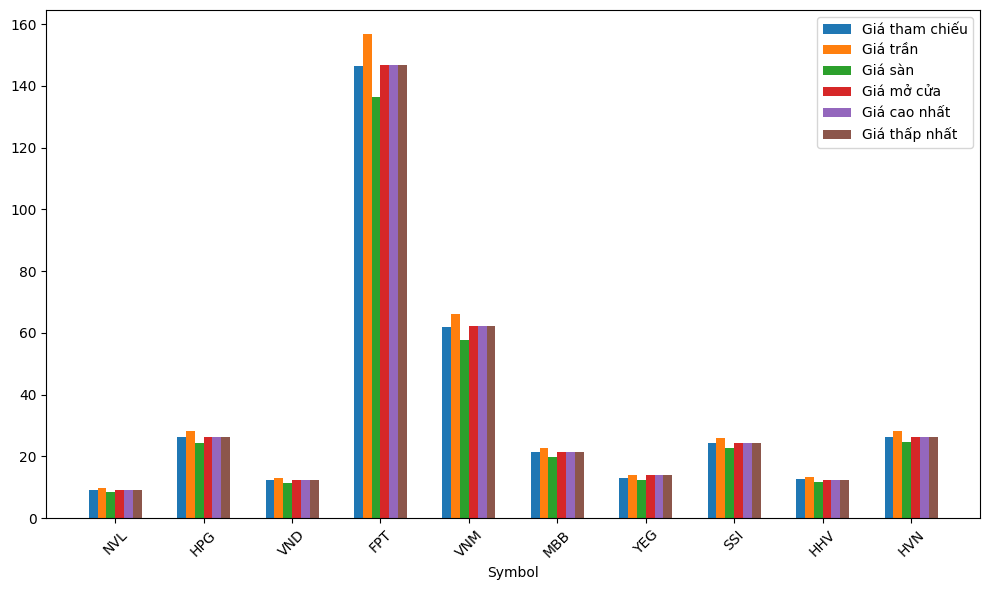

In [6]:

# Đảm bảo các giá trị cột là float
for i in range(len(df)):
    df['Giá tham chiếu'].iloc[i] = float(df['Giá tham chiếu'].iloc[i])
    df['Giá trần'].iloc[i] = float(df['Giá trần'].iloc[i])
    df['Giá sàn'].iloc[i] = float(df['Giá sàn'].iloc[i])
    df['Giá mở cửa'].iloc[i] = float(df['Giá mở cửa'].iloc[i])
    df['Giá cao nhất'].iloc[i] = float(df['Giá cao nhất'].iloc[i])
    df['Giá thấp nhất'].iloc[i] = float(df['Giá thấp nhất'].iloc[i])

# Vẽ biểu đồ
index = np.arange(len(df["Symbol"]))
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ các cột biểu đồ
plt.bar(index-0.25, np.array(df["Giá tham chiếu"]), 0.1, label="Giá tham chiếu")
plt.bar(index-0.15, np.array(df["Giá trần"]), 0.1, label="Giá trần")
plt.bar(index-0.05, np.array(df["Giá sàn"]), 0.1, label="Giá sàn")
plt.bar(index+0.05, np.array(df["Giá mở cửa"]), 0.1, label="Giá mở cửa")
plt.bar(index+0.15, np.array(df["Giá cao nhất"]), 0.1, label="Giá cao nhất")
plt.bar(index+0.25, np.array(df["Giá thấp nhất"]), 0.1, label="Giá thấp nhất")

# Thiết lập các giá trị trục x và y
ax.set_xlabel('Symbol')
ax.set_xticks(index)
ax.set_xticklabels(df["Symbol"])
ax.legend()

# Hiển thị biểu đồ
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


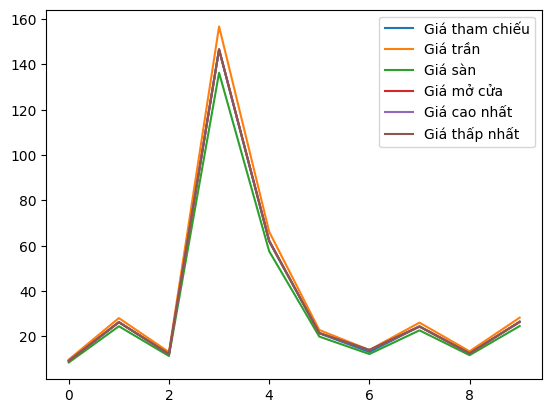

In [12]:
df.plot()
plt.show()

<Axes: xlabel='Giá trần', ylabel='Giá sàn'>

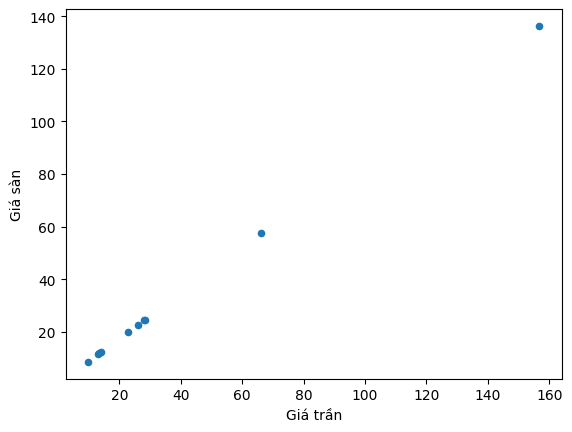

In [13]:
df.plot(kind = 'scatter', x = 'Giá trần', y = 'Giá sàn')